In [28]:
import pysam
from Bio import SeqIO
from collections import defaultdict
import numpy as np
import json
import pandas as pd

No handles with labels found to put in legend.


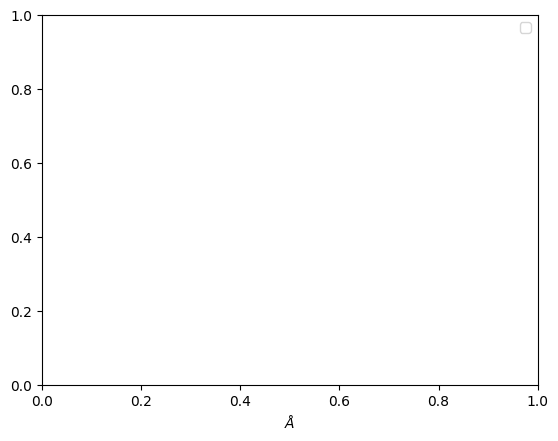

In [3]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel(r'$\AA$')
plt.legend()
plt.show()

In [31]:
1
cnt = 0
count_close = 0
# samfile = pysam.AlignmentFile('/home/dwarrel/projects/data_testing/sonja/sonja_HMK_data/sonja_new_dataset/fastq_join/test/bars-lib1-3.sam')
samfile = pysam.AlignmentFile('/home/dwarrel/projects/data_testing/sonja/sonja_HMK_data/sonja_old_dataset/fastq_join/test2/all_KSNGS.sam')
for read in samfile:
    if read.is_unmapped: continue
    # print(read)
    # print(read.query_name.split('_')[:-1])
    for barcode in read.query_name.split('_')[:-1]:
        # print(barcode.split(':')[1:])
        for bar_poss in barcode.split(':')[1:]:
            for bar_pos in bar_poss.split(','):
                # print(bar_pos)
                if len(read.cigartuples) > 1 and 2 in read.cigartuples[1]:
                    if abs(int(bar_pos)-read.cigartuples[0][1]) < 5:
                        # print(read)
                        # print(read.cigartuples, bar_pos)
                        count_close += 1
    cnt += 1
print(count_close, cnt, (count_close/cnt)*100)

14692 122074 12.03532283696774


In [33]:
cnt = 0
count_close = 0
samfile = pysam.AlignmentFile('/home/dwarrel/projects/data_testing/sonja/sonja_HMK_data/sonja_new_dataset/fastq_join/test2/all_lib4-6.sam')
# samfile = pysam.AlignmentFile('/home/dwarrel/projects/data_testing/sonja/sonja_HMK_data/sonja_old_dataset/fastq_join/test/all-KSNGS.sam')
for read in samfile:
    if read.is_unmapped: continue
    # print(read)
    # print(read.query_name.split('_')[:-1])
    for barcode in read.query_name.split('_')[:-1]:
        # print(barcode.split(':')[1:])
        for bar_poss in barcode.split(':')[1:]:
            for bar_pos in bar_poss.split(','):
                # print(bar_pos)
                if len(read.cigartuples) > 1 and 2 in read.cigartuples[1]:
                    if abs(int(bar_pos)-read.cigartuples[0][1]) < 5:
                        # print(read)
                        # print(read.cigartuples, bar_pos)
                        count_close += 1
    cnt += 1
print(count_close, cnt, (count_close/cnt)*100)

14719 220252 6.682799702159345


In [10]:
insert_bio = 0
insert_seq = 0
out_bio = 0
out_seq = 0
ins_ranges = [range(4867, 4956), range(4957, 5046), range(5047, 5133)]
file_p = '/home/dwarrel/projects/data_testing/sonja/sonja_HMK_data/sonja_old_dataset/fastq_join/test/variant/mutation_lines.txt'
tot = 0
with open(file_p, 'r') as file:
    file.readline()
    current_read = None
    curr_bar_positions = []
    for line in file:
        tot += 1
        splits = line.split()
        type_s = splits[-1]
        if type_s.upper() != 'M': continue
        # print(splits)
        name = splits[0]
        pos = int(splits[-3])
        if name != current_read:
            current_read = name
            curr_bar_positions = []
            for barcode in name.split('_')[:-1]:
                barcode_id, bar_positions = barcode.split(':')
                for bar_pos in bar_positions.split(','):
                    curr_bar_positions.append(int(bar_pos))
            active_ranges = []
            for p in curr_bar_positions:
                for r in ins_ranges:
                    if p+pos in r:
                        active_ranges += list(r)
            # active_ranges = [x if ]
        ref = splits[-2]
        read = splits[-5]
        quality = splits[-4]
        if ref.upper() != read.upper():
            if pos in active_ranges:
                if quality == 'F':
                    out_bio += 1
                else:
                    out_seq += 1
            else:
                if quality == 'F':
                    insert_bio += 1
                else:
                    insert_seq += 1
        # break

In [26]:
tot_mut = insert_seq+insert_bio+out_bio+out_seq
print(f"Total nucleotides: {tot:,}, total mutations {tot_mut:,}\n"
      f"Inserted region: {insert_bio+insert_seq:,} {((insert_bio+insert_seq)/tot_mut)*100:.1f}%, "
      f"wild region: {out_seq+out_bio:,} {((out_bio+out_seq)/tot_mut)*100:.1f}%\n\n"
      f"Total mut in inserted regions\nBiomut: {insert_bio:,} {(insert_bio/(insert_bio+insert_seq))*100:.1f}% "
      f"Seq_err: {insert_seq:,} {(insert_seq/(insert_bio+insert_seq))*100:.1f}%\n\n"
      f"Total mut in wildtype regions\nBiomut: {out_bio:,} {(out_bio/(out_bio+out_seq))*100:.1f}% "
      f"Seq_err: {out_seq:,} {(out_seq/(out_bio+out_seq))*100:.1f}%")

Total nucleotides: 41,472,611, total mutations 164,573
Inserted region: 136,610 83.0%, wild region: 27,963 17.0%

Total mut in inserted regions
Biomut: 122,092 89.4% Seq_err: 14,518 10.6%

Total mut in wildtype regions
Biomut: 23,506 84.1% Seq_err: 4,457 15.9%
